## Data Visualization

In [42]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
from PIL import Image

In [43]:
TRAIN_DATA_DIR = "../data/train"
TEST_DATA_DIR = "../data//test"

In [44]:
def load_training_data():


    image_data = []
    image_labels = []
    
    folders = os.listdir(TRAIN_DATA_DIR)
    for i in range(43):
        folder = folders[i]

        training_data_path = f"{TRAIN_DATA_DIR}/{folder}"
        training_images = os.listdir(training_data_path)

        for img in training_images:
            path_to_img = f"{training_data_path}/{img}"

            try:
                image_fromarray = None
                image = cv2.imread(path_to_img)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image_fromarray = Image.fromarray(image)

                resized_image = image_fromarray.resize((64, 64))

                image_data.append(np.array(resized_image))
                image_labels.append(i)

            except Exception as e:
                print("Error in " + img)
                print(e)

    
    # Changing the list to numpy array
    image_data = np.array(image_data)
    image_labels = np.array(image_labels)

    image_data = image_data / 255

    print("Training images loaded.")

    return image_data, image_labels

### Training Data Distribution over the 43 Classes

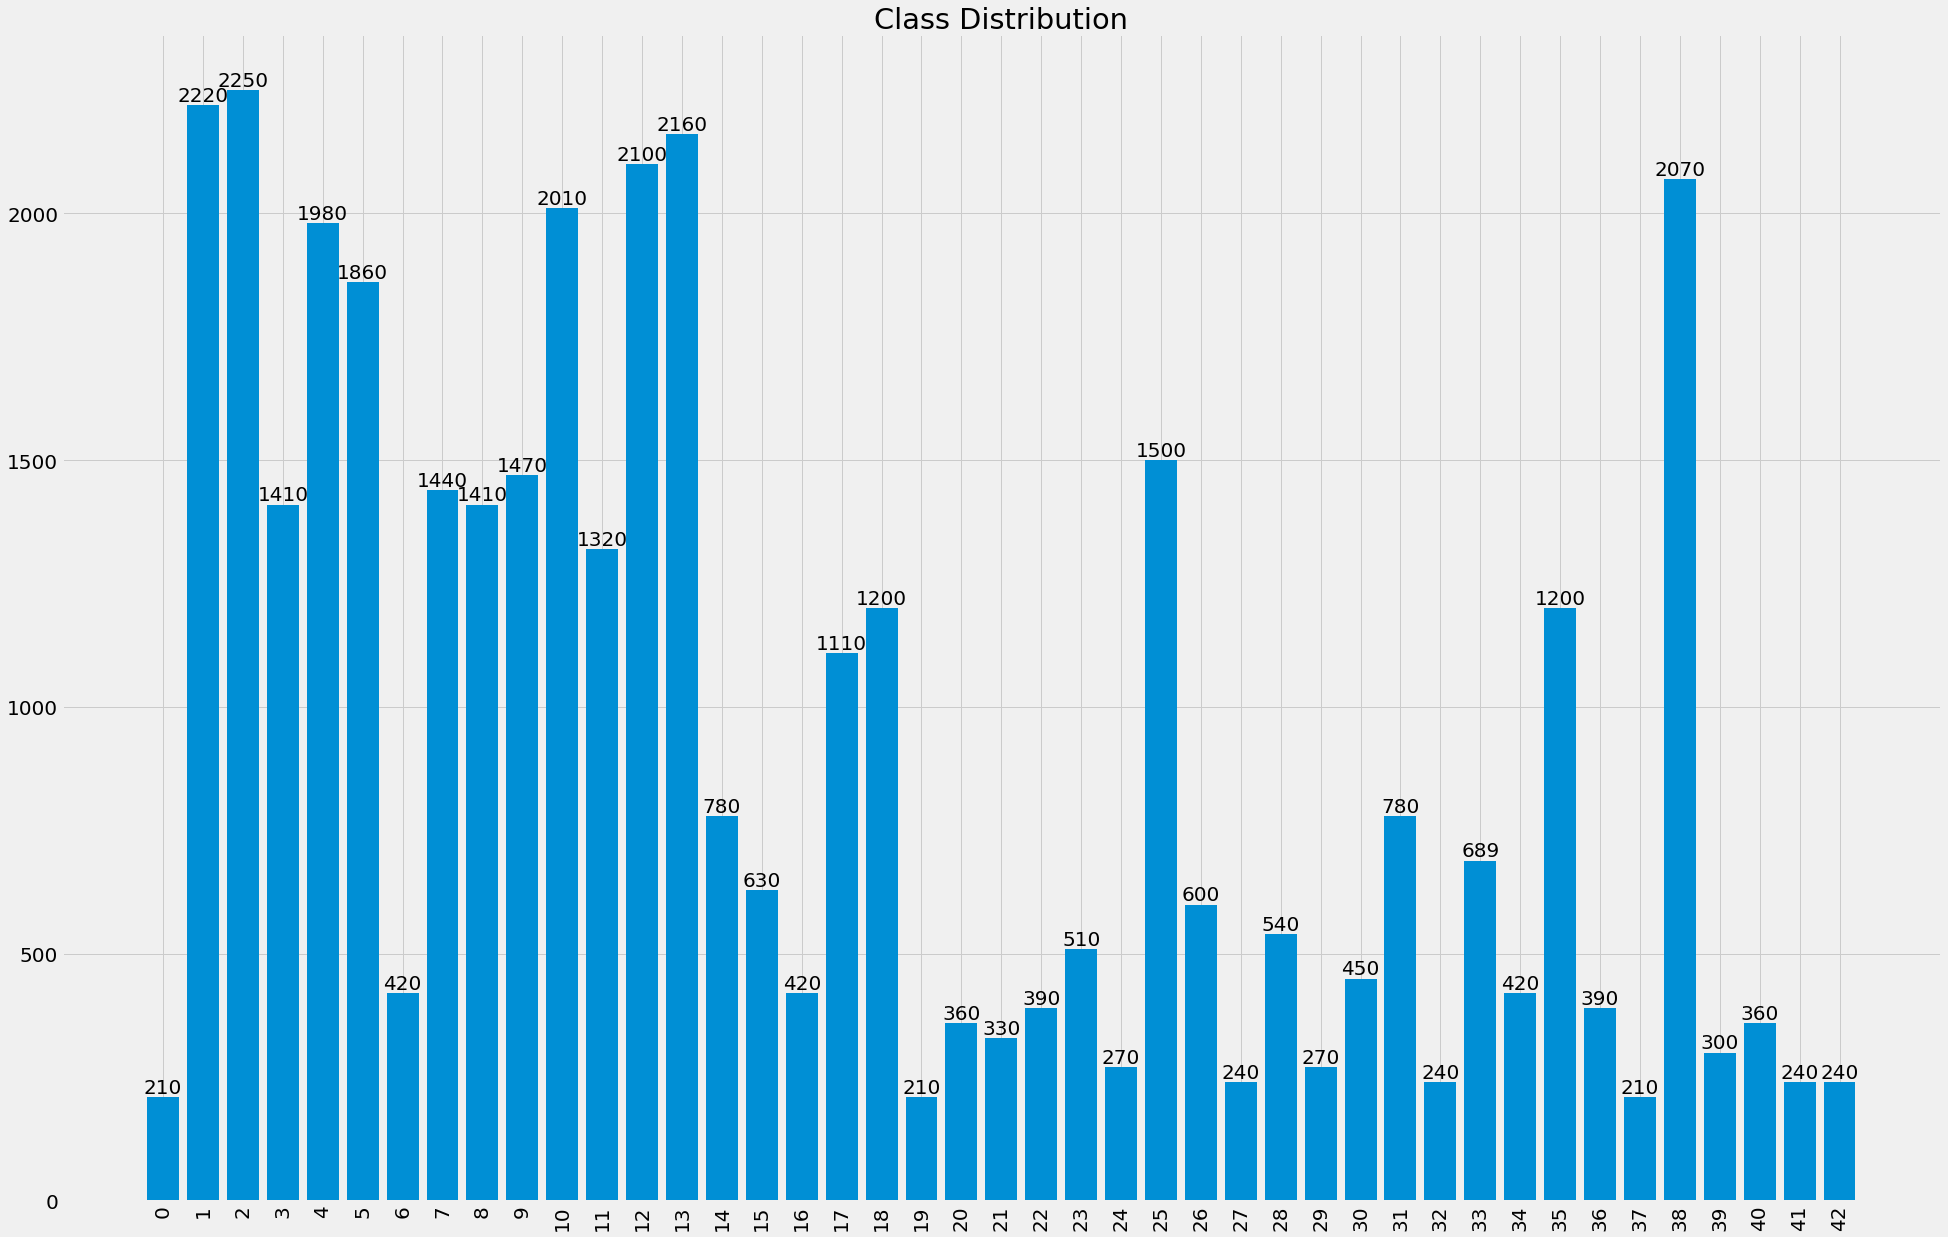

In [45]:
class_folders = os.listdir(TRAIN_DATA_DIR)

training_instances = []
class_index = []

for class_name in class_folders:
    train_files = os.listdir(f"{TRAIN_DATA_DIR}/{class_name}")
    training_instances.append(len(train_files))
    class_index.append(int(class_name))
    
# Ordered display of how data is distributed
zipped_lists = zip(training_instances, class_index)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
training_instances, class_index = [ list(tuple) for tuple in  tuples]


plt.figure(figsize=(30,20))  
# Plotting the number of images in each class
plt.title("Class Distribution")
plt.xlabel = "Road Sign Class"
plt.yabel = "Road Sign Count"
bars = plt.bar(class_index, training_instances)

for rect in bars:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.xticks(class_index, rotation='vertical')

plt.show()

### Testing Data Distribution over the 43 Classes

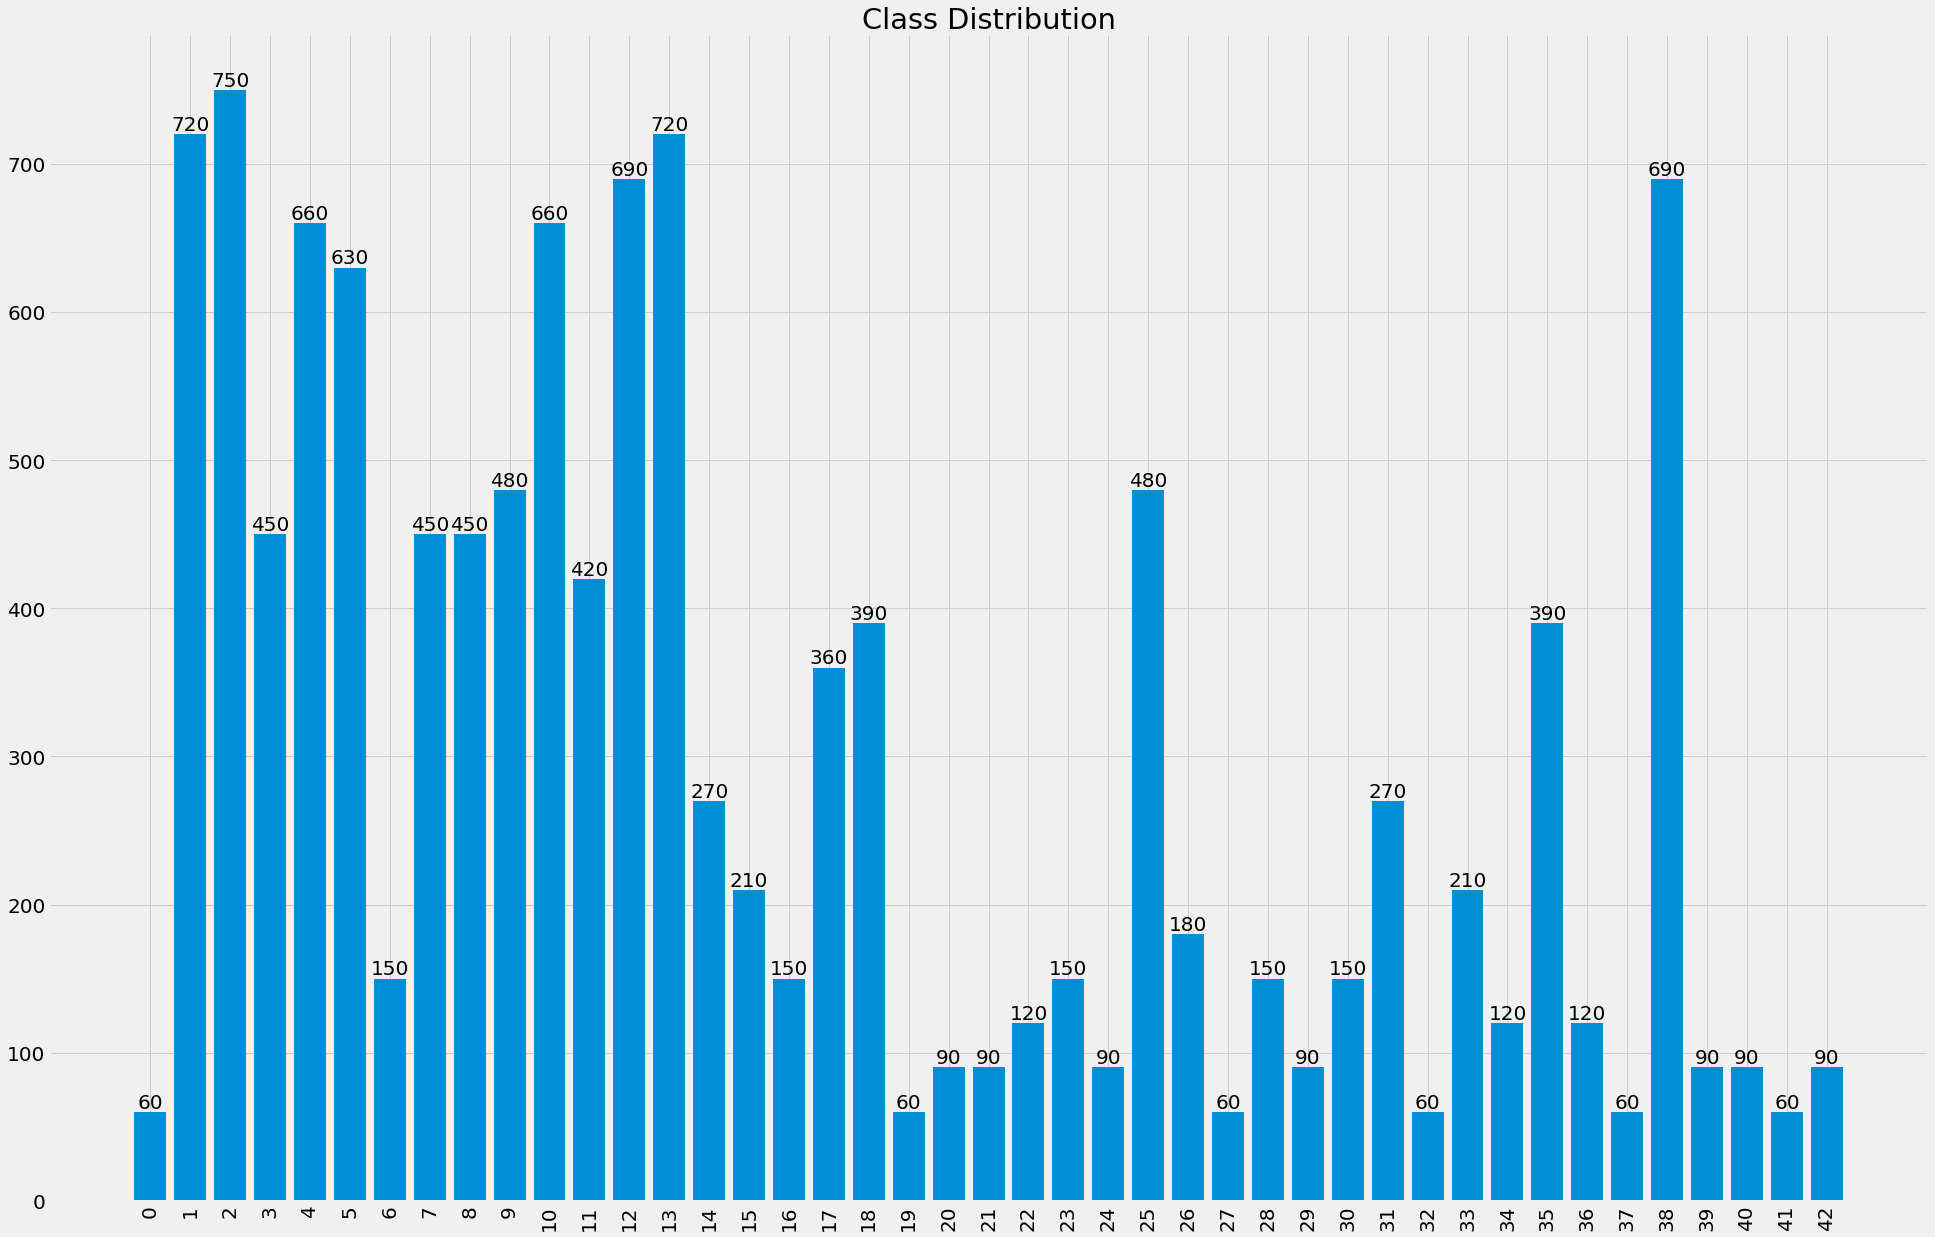

In [50]:
class_folders = os.listdir(TEST_DATA_DIR)

testing_instances = []
class_index = []

for class_name in class_folders:
    test_files = os.listdir(f"{TEST_DATA_DIR}/{class_name}")
    testing_instances.append(len(test_files))
    class_index.append(int(class_name))
    
# Ordered display of how data is distributed
zipped_lists = zip(testing_instances, class_index)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
testing_instances, class_index = [ list(tuple) for tuple in  tuples]


plt.figure(figsize=(30,20))  
# Plotting the number of images in each class
plt.title("Class Distribution")
plt.xlabel = "Road Sign Class"
plt.yabel = "Road Sign Count"
bars = plt.bar(class_index, testing_instances)

for rect in bars:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.xticks(class_index, rotation='vertical')

plt.show()

### Image Viz.

In [8]:
## Load training images. This takes a while!
training_images, training_labels = load_training_data()

Training images loaded.


In [10]:
print(training_images.shape)
print(training_labels.shape)

(39209, 64, 64, 3)
(39209,)


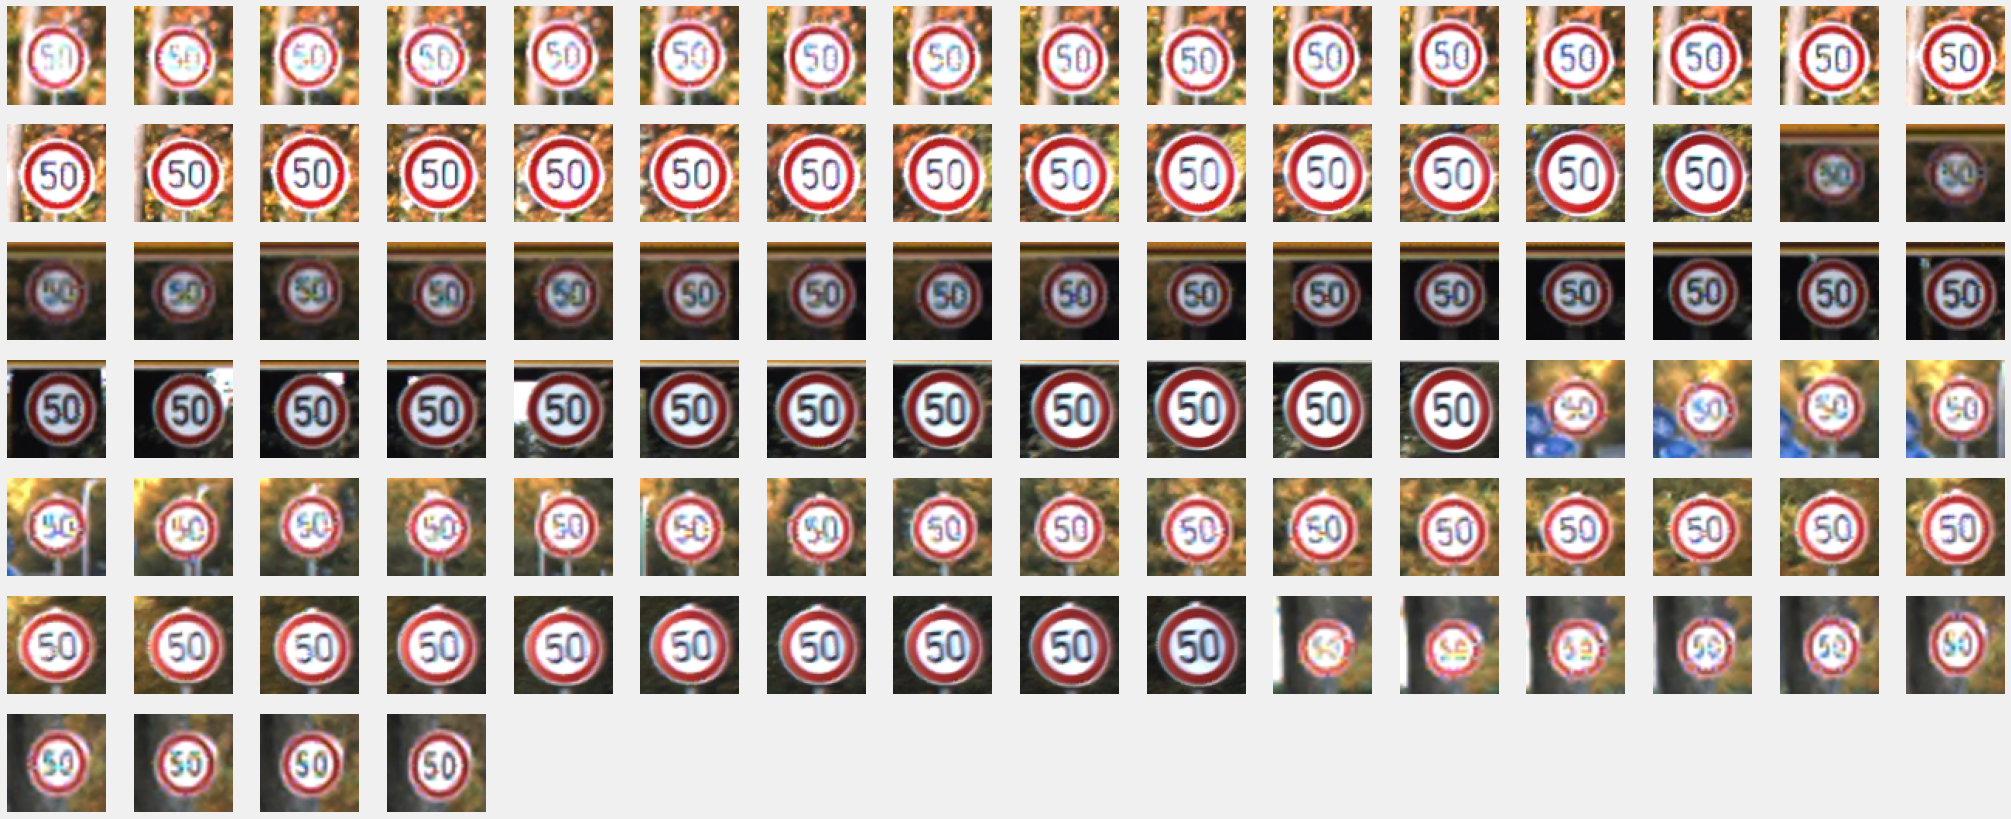

In [23]:
IMAGES_TO_SHOW = 100
BEGIN_INDEX = 3000
plt.figure(figsize=(32, 32))
i = 0
for image_index in range(BEGIN_INDEX, training_images.shape[0]):
    image = training_images[image_index]

    ax = plt.subplot(16, 16, i + 1)
    plt.imshow(image)
    plt.axis("off")

    i+= 1
    if i >= IMAGES_TO_SHOW:
        break
